In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [131]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [132]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

# **Exploratory Data Analysis**

At first we should examine the data.

In [133]:
train_df=pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The Age column has 177 missing values while Cabin has 687 missing values and embark column has 2 missing values.Lets see the percentages.

In [135]:
train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [60]:
null_percent=train_df.isnull().sum()/len(train_df)*100
null_percent.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

#### It shows us the distribution of Nulls.

<AxesSubplot:>

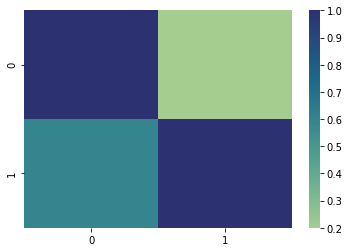

In [61]:
sns.heatmap([[1,0.2],[0.6,1]],cmap='crest')

In [136]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

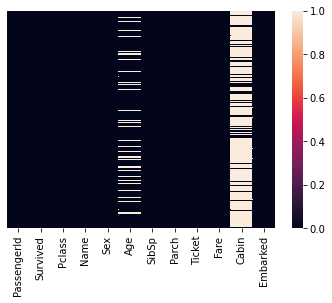

In [137]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=True)

In [63]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Lets rename the columns for simplicity as all in lower case letters.

In [64]:
# Python program to demonstrate working
# of map.
  
# Return double of n
def addition(n):
    return n *3
  
# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(list(result))

[3, 6, 9, 12]


In [65]:
train_df.columns=map(str.lower,train_df.columns)
train_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Visualization**

How many people lived and how many people died?

In [66]:
train_df.groupby('survived').count()['passengerid']

survived
0    549
1    342
Name: passengerid, dtype: int64

In [67]:
fig=px.sunburst(train_df,path=['sex','survived'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

<Figure size 432x288 with 0 Axes>

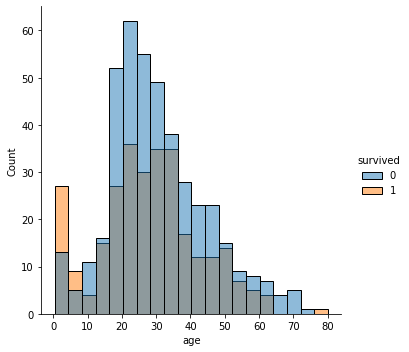

In [68]:
plt.figure()
sns.displot(train_df,x='age',hue='survived')



The affect of the class and age on survival.

In [69]:
fig = px.histogram(train_df, x="age",y="survived",color="pclass", marginal="box")
fig.show()

**CLASS**

<AxesSubplot:xlabel='pclass', ylabel='count'>

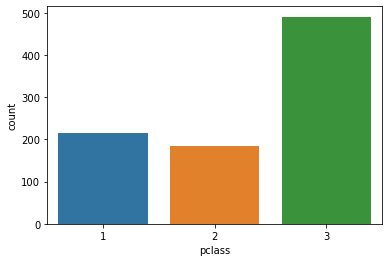

In [70]:
sns.countplot(data=train_df,x='pclass')

<AxesSubplot:xlabel='pclass', ylabel='count'>

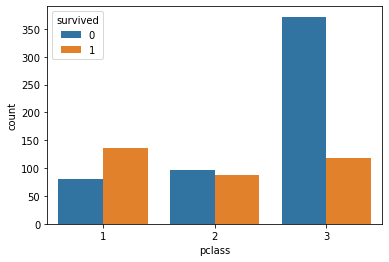

In [71]:
sns.countplot(data=train_df,x='pclass',hue='survived')

In [72]:
fig=px.sunburst(train_df,path=['pclass','survived'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

**Sex**

<AxesSubplot:xlabel='sex', ylabel='count'>

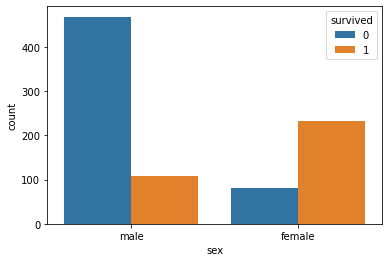

In [73]:
sns.countplot(data=train_df,x='sex',hue='survived')

In [74]:
train_df['cabin'].dropna().astype(str).str[0] 

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: cabin, Length: 204, dtype: object

In [75]:
train_df['new_cabin'] = train_df.cabin.dropna().astype(str).str[0] 


In [76]:
train_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='survived', ylabel='count'>

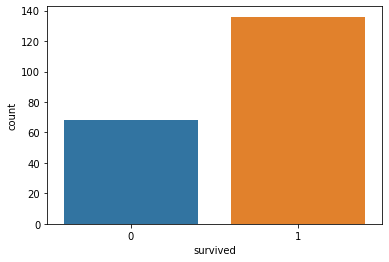

In [77]:
sns.countplot(train_df[train_df['new_cabin'].isnull()==False]['survived'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='survived', ylabel='count'>

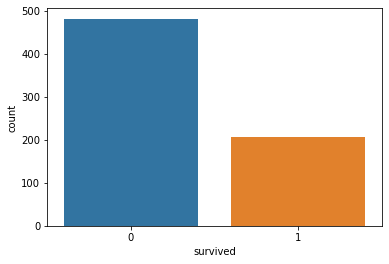

In [78]:
sns.countplot(train_df[train_df['new_cabin'].isnull()==True]['survived'])

In [79]:
train_df.groupby(by=['new_cabin','pclass']).pclass.count()


new_cabin  pclass
A          1         15
B          1         47
C          1         59
D          1         29
           2          4
E          1         25
           2          4
           3          3
F          2          8
           3          5
G          3          4
T          1          1
Name: pclass, dtype: int64

In [80]:
train_df.groupby(by='pclass').pclass.count()


pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

In [81]:
train_df.loc[(train_df.survived==0) & (train_df['cabin'].isnull())].count()

passengerid    481
survived       481
pclass         481
name           481
sex            481
age            364
sibsp          481
parch          481
ticket         481
fare           481
cabin            0
embarked       481
new_cabin        0
dtype: int64

The knowledge of the cabin of the passenger directly has an influence on survival rate therefore, the cabin knowledge can be changed with 1 and 0 which are representing known or unknown.

In [82]:
train_df=train_df.drop(columns='new_cabin')

In [83]:
train_df

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **DATA CLEANING AND FEATURE SELECTION**

 **Train Test Split**

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_df.drop(columns=['survived']),train_df.survived,random_state=42)

**Cabin**

In [ ]:
#df.apply(func)

In [85]:
def CExist(df):
    df['cabin']=df['cabin'].fillna(0)
    df.cabin=df.cabin.apply(lambda x: 0 if x==0 else 1)
    return df
    

In [86]:
x_train=CExist(x_train)
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,1,S
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S
...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,0,S
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S


**Title** 

In [87]:
train_df['name'].apply(lambda name: name.split(',')[1].split('.')[0].strip()).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Don               1
Ms                1
Mme               1
Lady              1
the Countess      1
Capt              1
Jonkheer          1
Name: name, dtype: int64

In [88]:
normalized_titles = {"Capt":"o",
                     "Col":"o",
                     "Major":"o",
                     "Jonkheer":"r",
                     "Don":"r",
                     "Sir" :"r",
                     "Dr":"o",
                     "Rev":"o",
                     "the Countess":"r",
                     "Dona":"r",
                     "Mme":"Mrs",
                     "Mlle":"Miss",
                     "Ms":"Mrs",
                     "Mr" :"Mr",
                     "Mrs" :"Mrs",
                     "Miss":"Miss",
                     "Master":"Master",
                     "Lady":"r"}
def normalize_titles(df):
    df['title']=df['name'].apply(lambda name:name.split(',')[1].split('.')[0].strip()).map(normalized_titles)
    return df


In [89]:
x_train=normalize_titles(x_train)

In [90]:
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,1,S,Mr
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S,Mr
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S,Mrs
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S,Mr
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S,Master
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S,Miss
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,0,S,Mr
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S,Mr
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S,Miss


**Name Lenght**

In [91]:
train_df.name.apply(lambda x:len(x)).describe()

count    891.000000
mean      26.965208
std        9.281607
min       12.000000
25%       20.000000
50%       25.000000
75%       30.000000
max       82.000000
Name: name, dtype: float64

In [92]:
def name_length(df):
    df['name_len']=df.name.apply(lambda x:1 if len(x)>25 else 0)
    return df

In [93]:
x_train=name_length(x_train)
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,name_len
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,1,S,Mr,0
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S,Mr,0
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S,Mrs,1
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S,Mr,0
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S,Master,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S,Miss,1
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,0,S,Mr,0
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S,Mr,0
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S,Miss,0


**Fill Age**

In [94]:
def fill_age(trainset,testset=None):
    if testset is None:
        trainset=trainset.fillna(trainset.median())
        return trainset
    else:
        testset=testset.fillna(trainset.age.median())
        return testset

In [95]:
x_train = fill_age(x_train)
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,name_len
298,299,1,"Saalfeld, Mr. Adolphe",male,28.00,0,0,19988,30.5000,1,S,Mr,0
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S,Mr,0
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S,Mrs,1
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S,Mr,0
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S,Master,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S,Miss,1
270,271,1,"Cairns, Mr. Alexander",male,28.00,0,0,113798,31.0000,0,S,Mr,0
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S,Mr,0
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S,Miss,0


**Age Groups**

In [96]:
def age_categorize(trainSet):
  interval = (0, 5, 12, 18, 25, 35, 60, 100)
  age_cat = ['babies', 'children', 'teenage', 'student', 'young', 'adult', 'senior']
  trainSet["age_cat"] = pd.cut(trainSet.age, interval, labels=age_cat)
  return trainSet

In [97]:
x_train = age_categorize(x_train)
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,name_len,age_cat
298,299,1,"Saalfeld, Mr. Adolphe",male,28.00,0,0,19988,30.5000,1,S,Mr,0,young
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S,Mr,0,student
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S,Mrs,1,student
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S,Mr,0,student
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S,Master,1,babies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S,Miss,1,student
270,271,1,"Cairns, Mr. Alexander",male,28.00,0,0,113798,31.0000,0,S,Mr,0,young
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S,Mr,0,adult
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S,Miss,0,teenage


**Family Boarded**

In [98]:
def family(df):
    df['family']=df['sibsp']+df['parch']
    df['family']=df['family'].apply(lambda x:1 if x>0 else 0)
    return df

In [99]:
x_train=family(x_train)
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,name_len,age_cat,family
298,299,1,"Saalfeld, Mr. Adolphe",male,28.00,0,0,19988,30.5000,1,S,Mr,0,young,0
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S,Mr,0,student,0
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S,Mrs,1,student,1
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S,Mr,0,student,0
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S,Master,1,babies,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S,Miss,1,student,0
270,271,1,"Cairns, Mr. Alexander",male,28.00,0,0,113798,31.0000,0,S,Mr,0,young,0
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S,Mr,0,adult,1
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S,Miss,0,teenage,1


**Fare Categories**

In [100]:
def fare_categorize(trainSet):
  quant = (-1, 0, 8, 15, 31, 600)
  label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']
  trainSet["fare_cat"] = pd.cut(trainSet.fare, quant, labels=label_quants)
  return trainSet

In [101]:
x_train=fare_categorize(x_train)


In [102]:
x_train

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,name_len,age_cat,family,fare_cat
298,299,1,"Saalfeld, Mr. Adolphe",male,28.00,0,0,19988,30.5000,1,S,Mr,0,young,0,quart_3
884,885,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.0500,0,S,Mr,0,student,0,quart_1
247,248,2,"Hamalainen, Mrs. William (Anna)",female,24.00,0,2,250649,14.5000,0,S,Mrs,1,student,1,quart_2
478,479,3,"Karlsson, Mr. Nils August",male,22.00,0,0,350060,7.5208,0,S,Mr,0,student,0,quart_1
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,S,Master,1,babies,1,quart_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.00,0,0,343120,7.6500,0,S,Miss,1,student,0,quart_1
270,271,1,"Cairns, Mr. Alexander",male,28.00,0,0,113798,31.0000,0,S,Mr,0,young,0,quart_3
860,861,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,0,S,Mr,0,adult,1,quart_2
435,436,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,1,S,Miss,0,teenage,1,quart_4


**Encoding Categorical Data**

In [103]:
def get_dummies_t(dataFrame):
  for column in dataFrame.columns:
    if (dataFrame[column].nunique()<10  and dataFrame[column].dtype==np.dtype('O')) or (dataFrame[column].nunique()<10 and dataFrame[column].nunique()>2):
      if column == "sibsp" or column == "parch" or column == "ticket_token":
        continue
      if column == "title":
        dataFrame = dataFrame.join(pd.get_dummies(dataFrame[column], prefix=column))
        dataFrame.drop(columns=column, inplace = True)
        continue
      dataFrame = dataFrame.join(pd.get_dummies(dataFrame[column], prefix=column, drop_first=True))
      dataFrame.drop(columns=column, inplace = True)
  return dataFrame

In [104]:
x_train=get_dummies_t(x_train)
x_train

,passengerid,name,age,sibsp,parch,ticket,fare,cabin,name_len,family,...,age_cat_children,age_cat_teenage,age_cat_student,age_cat_young,age_cat_adult,age_cat_senior,fare_cat_quart_1,fare_cat_quart_2,fare_cat_quart_3,fare_cat_quart_4
298,299,"Saalfeld, Mr. Adolphe",28.00,0,0,19988,30.5000,1,0,0,...,0,0,0,1,0,0,0,0,1,0
884,885,"Sutehall, Mr. Henry Jr",25.00,0,0,SOTON/OQ 392076,7.0500,0,0,0,...,0,0,1,0,0,0,1,0,0,0
247,248,"Hamalainen, Mrs. William (Anna)",24.00,0,2,250649,14.5000,0,1,1,...,0,0,1,0,0,0,0,1,0,0
478,479,"Karlsson, Mr. Nils August",22.00,0,0,350060,7.5208,0,0,0,...,0,0,1,0,0,0,1,0,0,0
305,306,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,1,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,"Salkjelsvik, Miss. Anna Kristine",21.00,0,0,343120,7.6500,0,1,0,...,0,0,1,0,0,0,1,0,0,0
270,271,"Cairns, Mr. Alexander",28.00,0,0,113798,31.0000,0,0,0,...,0,0,0,1,0,0,0,0,1,0
860,861,"Hansen, Mr. Claus Peter",41.00,2,0,350026,14.1083,0,0,1,...,0,0,0,0,1,0,0,1,0,0
435,436,"Carter, Miss. Lucile Polk",14.00,1,2,113760,120.0000,1,0,1,...,0,1,0,0,0,0,0,0,0,1


**Drop Text Columns**

In [105]:
def drop_text(dataFrame):
  for column in dataFrame.columns:
    if dataFrame[column].dtype==object:
      dataFrame.drop(columns=column, inplace = True)
  return dataFrame

In [106]:
x_train=drop_text(x_train)

In [107]:
x_train.columns

Index(['passengerid', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'name_len',
       'family', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q',
       'embarked_S', 'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_o', 'title_r', 'age_cat_children', 'age_cat_teenage',
       'age_cat_student', 'age_cat_young', 'age_cat_adult', 'age_cat_senior',
       'fare_cat_quart_1', 'fare_cat_quart_2', 'fare_cat_quart_3',
       'fare_cat_quart_4'],
      dtype='object')

In [108]:
trainaya=x_train

# **Test Preperation**

In [109]:
from sklearn.preprocessing import StandardScaler

def scale_test(x_train,x_test=None):
    scaler=StandardScaler()
    scaler.fit(x_train)
    if x_test is None:
        return pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    return pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [110]:
#x_train=scale_test(x_train)

In [111]:
x_train

,passengerid,age,sibsp,parch,fare,cabin,name_len,family,pclass_2,pclass_3,...,age_cat_children,age_cat_teenage,age_cat_student,age_cat_young,age_cat_adult,age_cat_senior,fare_cat_quart_1,fare_cat_quart_2,fare_cat_quart_3,fare_cat_quart_4
298,299,28.00,0,0,30.5000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
884,885,25.00,0,0,7.0500,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
247,248,24.00,0,2,14.5000,0,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0
478,479,22.00,0,0,7.5208,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
305,306,0.92,1,2,151.5500,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,21.00,0,0,7.6500,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
270,271,28.00,0,0,31.0000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
860,861,41.00,2,0,14.1083,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
435,436,14.00,1,2,120.0000,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [112]:
def prepare_test(x_train, x_test):
  x_test = CExist(x_test)
  x_test = normalize_titles(x_test)
  x_test = name_length(x_test)
  x_test = fill_age(x_train, x_test)
  x_test = age_categorize(x_test)
  x_test = fare_categorize(x_test)
  x_test = family(x_test)
  x_test = get_dummies_t(x_test)
  x_test = drop_text(x_test)
  #x_test = scale_test(x_train, x_test)

  return x_test

In [113]:
prepare_test(x_train,x_test)

,passengerid,age,sibsp,parch,fare,cabin,name_len,family,pclass_2,pclass_3,...,age_cat_children,age_cat_teenage,age_cat_student,age_cat_young,age_cat_adult,age_cat_senior,fare_cat_quart_1,fare_cat_quart_2,fare_cat_quart_3,fare_cat_quart_4
709,710,28.0,1,1,15.2458,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
439,440,31.0,0,0,10.5000,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
840,841,20.0,0,0,7.9250,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
720,721,6.0,0,1,33.0000,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
39,40,14.0,1,0,11.2417,0,1,1,0,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,25.0,0,1,26.0000,0,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
425,426,28.0,0,0,7.2500,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
101,102,28.0,0,0,7.8958,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
199,200,24.0,0,0,13.0000,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0


# **Model Training**

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def classification_metrics(y_test,predict):
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_test,predict))
    print("\nAccuracy: ",accuracy_score(y_test,predict))
    print("\nClassification report:\n")
    print(classification_report(y_test,predict))

**Logistic Regression**

In [123]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=1000,random_state=0)
lr.fit(x_train,y_train)
predict=pd.DataFrame(data=lr.predict(prepare_test(x_train,x_test)),index=x_test.index)
classification_metrics(y_test,predict)
predict2=pd.DataFrame(data=lr.predict(x_train),index=x_train.index)
classification_metrics(y_train,predict2)



Confusion Matrix:

[[114  20]
 [ 20  69]]

Accuracy:  0.820627802690583

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       134
           1       0.78      0.78      0.78        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

Confusion Matrix:

[[379  36]
 [ 66 187]]

Accuracy:  0.8473053892215568

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       415
           1       0.84      0.74      0.79       253

    accuracy                           0.85       668
   macro avg       0.85      0.83      0.83       668
weighted avg       0.85      0.85      0.85       668



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Decision Tree**

In [125]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)
predict=pd.DataFrame(data=dtc.predict(prepare_test(x_train,x_test)),index=x_test.index)
predict=pd.DataFrame(data=dtc.predict(prepare_test(x_train,x_test)),index=x_test.index)
classification_metrics(y_test,predict)
predict2=pd.DataFrame(data=dtc.predict(x_train),index=x_train.index)
classification_metrics(y_train,predict2)

Confusion Matrix:

[[104  30]
 [ 21  68]]

Accuracy:  0.7713004484304933

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       134
           1       0.69      0.76      0.73        89

    accuracy                           0.77       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.77      0.77       223

Confusion Matrix:

[[415   0]
 [  0 253]]

Accuracy:  1.0

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       1.00      1.00      1.00       253

    accuracy                           1.00       668
   macro avg       1.00      1.00      1.00       668
weighted avg       1.00      1.00      1.00       668

